In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sb
import pandas_profiling as pd_prof

In [5]:
data_train=pd.read_csv('Sales_Dataset.csv')

In [6]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
data=data_train.copy()# making the copy for getting inferance of the original data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
pd_prof.ProfileReport(data)

In [11]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
data_dict=dict(data.dtypes)

In [13]:
data_dict

{'Item_Identifier': dtype('O'),
 'Item_Weight': dtype('float64'),
 'Item_Fat_Content': dtype('O'),
 'Item_Visibility': dtype('float64'),
 'Item_Type': dtype('O'),
 'Item_MRP': dtype('float64'),
 'Outlet_Identifier': dtype('O'),
 'Outlet_Establishment_Year': dtype('int64'),
 'Outlet_Size': dtype('O'),
 'Outlet_Location_Type': dtype('O'),
 'Outlet_Type': dtype('O'),
 'Item_Outlet_Sales': dtype('float64')}

In [14]:
numeric_columns=[]
categorial_columns=[]
for i in data_dict:
    if data_dict[i] in ['float64', 'int64', 'float32', 'int32']:
        numeric_columns.append(i)
    else:
        categorial_columns.append(i)

In [15]:
numeric_columns

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [16]:
categorial_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [17]:
data_cat=data[categorial_columns]

In [18]:
dum=pd.get_dummies(data_cat, prefix='a')
num=data[numeric_columns]
dum.head()

,a_DRA12,a_DRA24,a_DRA59,a_DRB01,a_DRB13,a_DRB24,a_DRB25,a_DRB48,a_DRC01,a_DRC12,...,a_High,a_Medium,a_Small,a_Tier 1,a_Tier 2,a_Tier 3,a_Grocery Store,a_Supermarket Type1,a_Supermarket Type2,a_Supermarket Type3
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [19]:
num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [21]:
?sb.scatterplot

In [23]:
import matplotlib.pyplot as plt

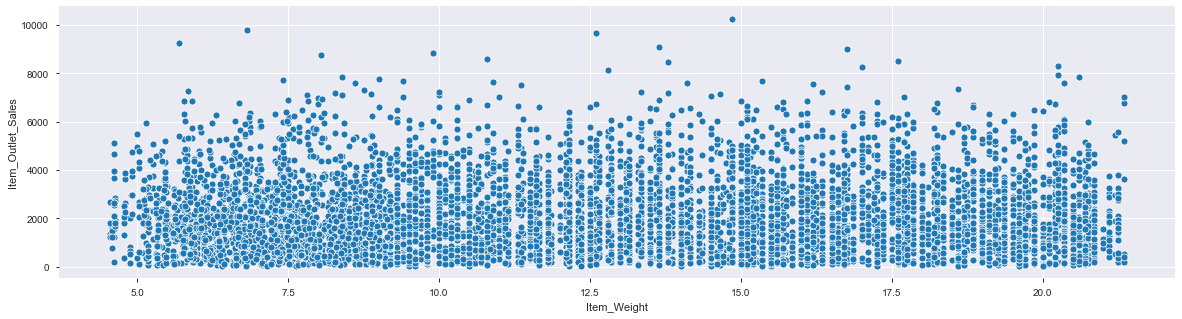

In [24]:
plt.figure(figsize=(20,5))
sb.scatterplot(num['Item_Weight'],num['Item_Outlet_Sales'])

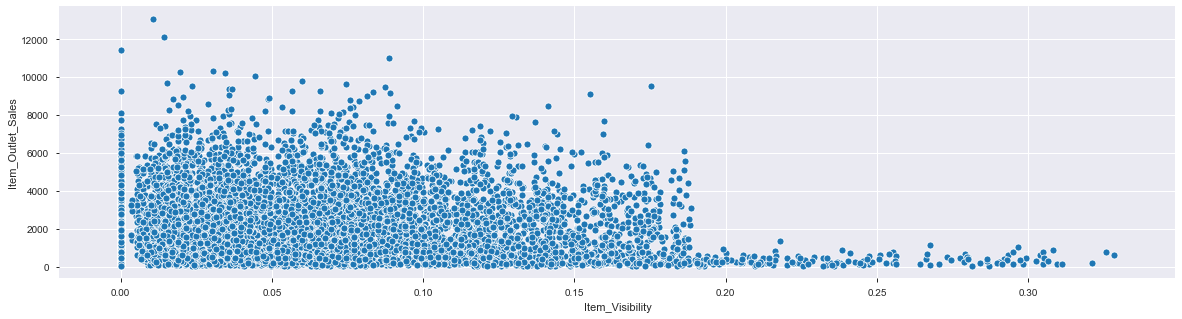

In [25]:
plt.figure(figsize=(20,5))
sb.scatterplot(num['Item_Visibility'],num['Item_Outlet_Sales'])

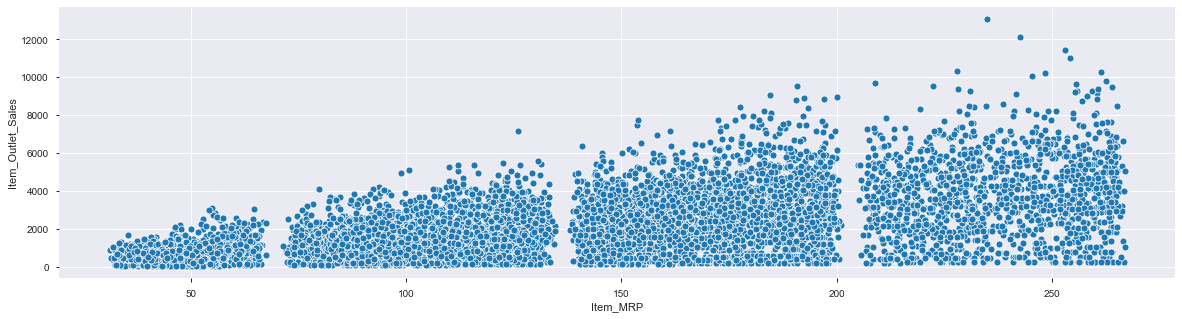

In [26]:
plt.figure(figsize=(20,5))
sb.scatterplot(num['Item_MRP'],num['Item_Outlet_Sales'])

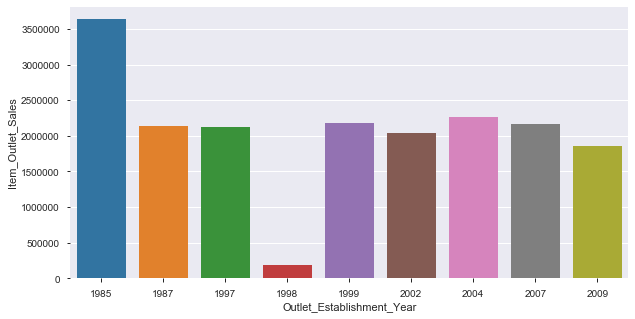

In [28]:
plt.figure(figsize=(10,5))
x=pd.DataFrame(data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum()).reset_index()
sb.barplot(x['Outlet_Establishment_Year'],x['Item_Outlet_Sales'])

In [29]:
data_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


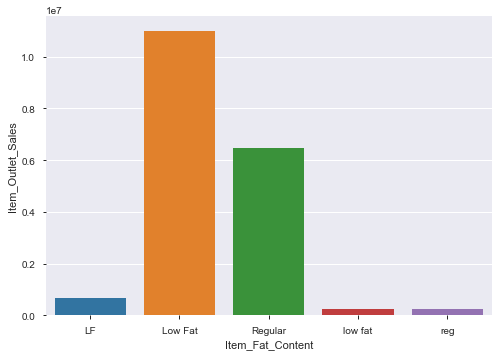

In [30]:
x=pd.DataFrame(data.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum()).reset_index()
sb.barplot(x['Item_Fat_Content'],x['Item_Outlet_Sales'])

In [31]:
for i in range(len(data['Item_Fat_Content'])):
    if data['Item_Fat_Content'][i]=='LF':
        data['Item_Fat_Content'][i]='Low Fat'
    if data['Item_Fat_Content'][i]=='reg':
        data['Item_Fat_Content'][i]='Regular'
    if data['Item_Fat_Content'][i]=='low fat':
        data['Item_Fat_Content'][i]='Low Fat'
        

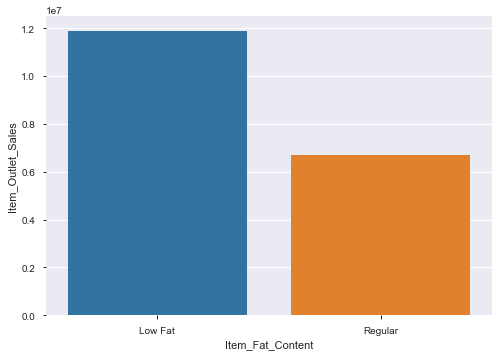

In [32]:
y=pd.DataFrame(data.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum()).reset_index()
sb.barplot(y['Item_Fat_Content'],y['Item_Outlet_Sales'])

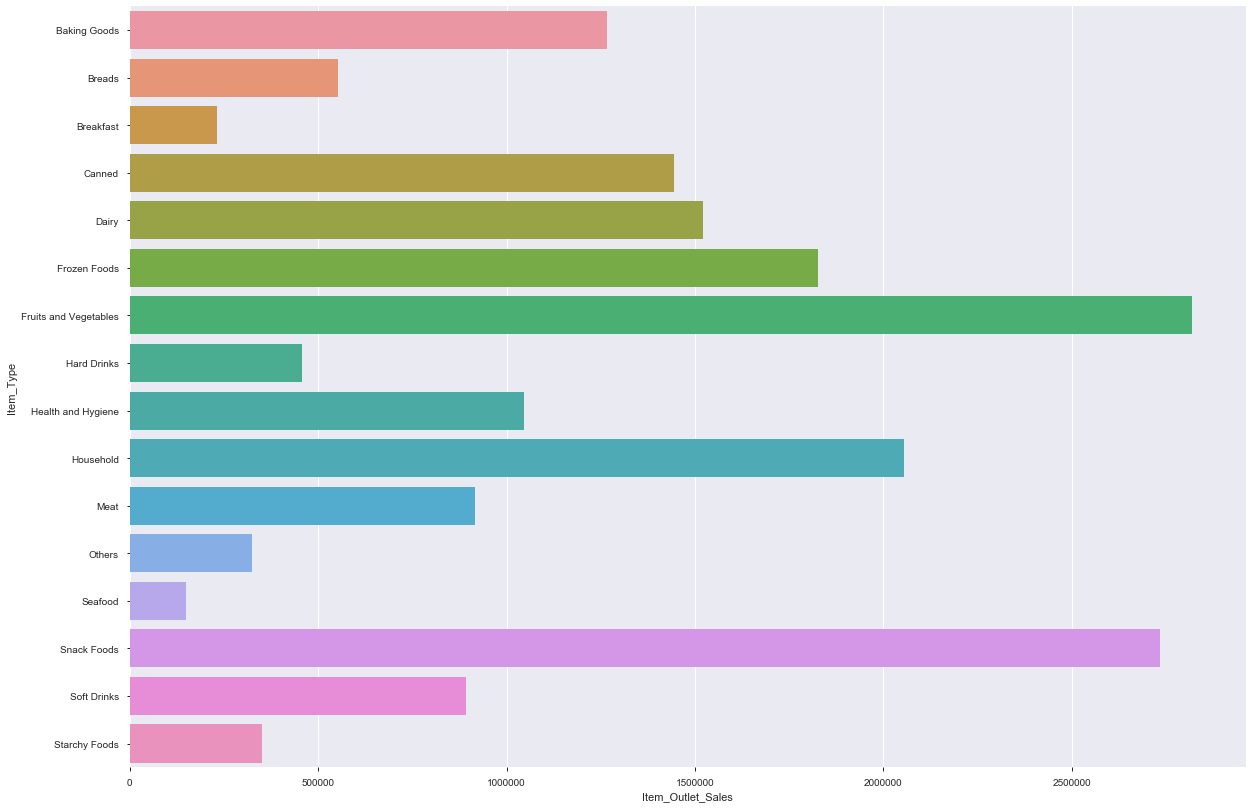

In [33]:
plt.figure(figsize=(20,14))
y=pd.DataFrame(data.groupby(['Item_Type'])['Item_Outlet_Sales'].sum()).reset_index()
sb.barplot(y['Item_Outlet_Sales'],y['Item_Type'])

In [34]:
data.groupby(['Outlet_Identifier','Outlet_Size'])['Outlet_Size'].count()

Outlet_Identifier  Outlet_Size
OUT013             High           932
OUT018             Medium         928
OUT019             Small          528
OUT027             Medium         935
OUT035             Small          930
OUT046             Small          930
OUT049             Medium         930
Name: Outlet_Size, dtype: int64

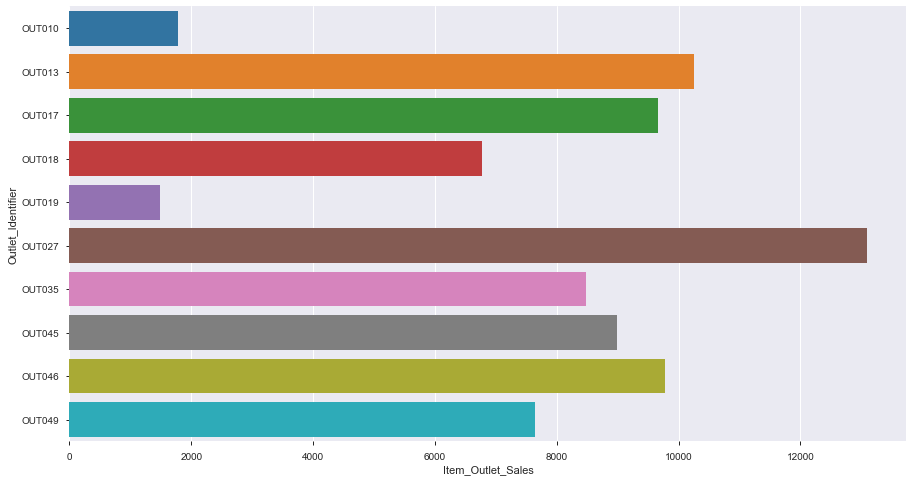

In [35]:
plt.figure(figsize=(15,8))
y=pd.DataFrame(data.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].max()).reset_index()
sb.barplot(y['Item_Outlet_Sales'],y['Outlet_Identifier'])

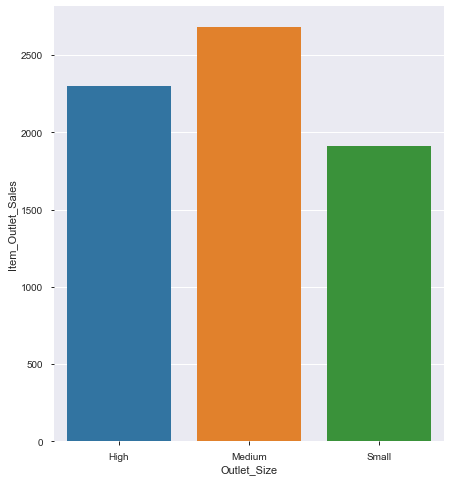

In [36]:
plt.figure(figsize=(7,8))
y=pd.DataFrame(data.groupby(['Outlet_Size'])['Item_Outlet_Sales'].mean()).reset_index()
sb.barplot(y['Outlet_Size'],y['Item_Outlet_Sales'])

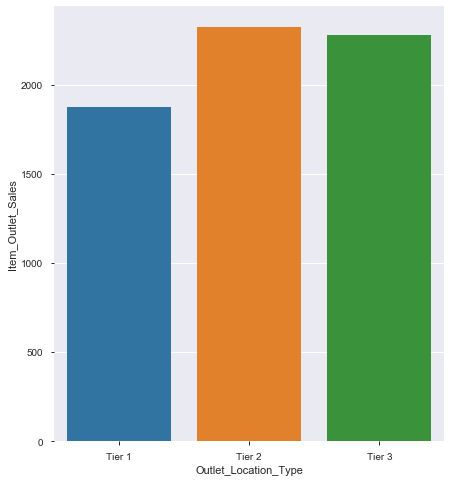

In [37]:
plt.figure(figsize=(7,8))
y=pd.DataFrame(data.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].mean()).reset_index()
sb.barplot(y['Outlet_Location_Type'],y['Item_Outlet_Sales'])

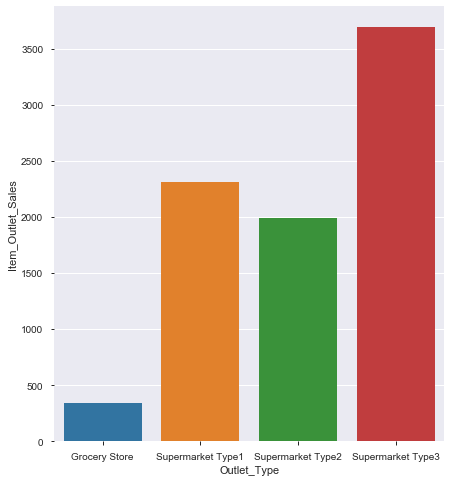

In [38]:
plt.figure(figsize=(7,8))
y=pd.DataFrame(data.groupby(['Outlet_Type'])['Item_Outlet_Sales'].mean()).reset_index()
sb.barplot(y['Outlet_Type'],y['Item_Outlet_Sales'])

In [39]:
num.isnull().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

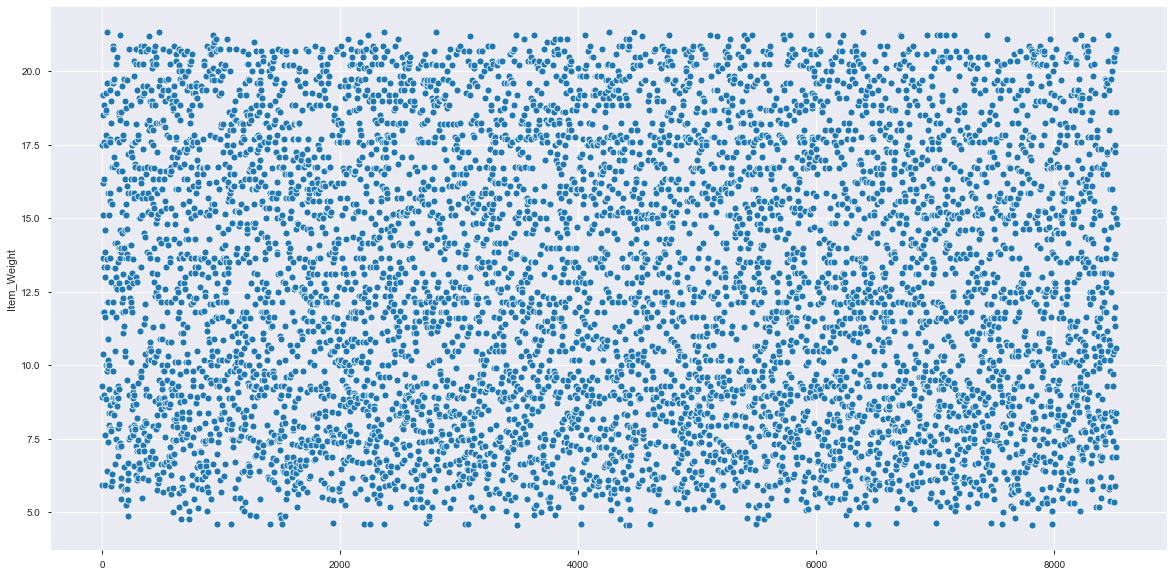

In [40]:
plt.figure(figsize=(20,10))
sb.scatterplot(num.index,num['Item_Weight'])

(array([483., 870., 865., 664., 779., 629., 755., 735., 677., 603.]),
 array([ 4.555 ,  6.2345,  7.914 ,  9.5935, 11.273 , 12.9525, 14.632 ,
        16.3115, 17.991 , 19.6705, 21.35  ]),
 <a list of 10 Patch objects>)

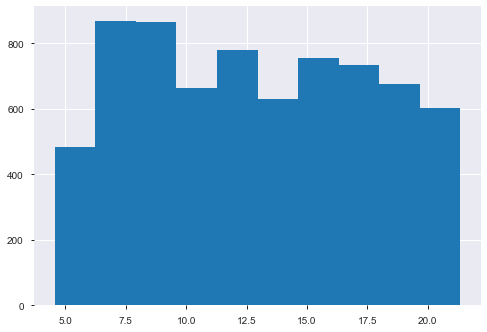

In [41]:
plt.hist(data_train['Item_Weight'])

In [43]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [44]:
ddd=data['Item_Identifier']
hh=[]
for i in ddd:
    hh.append("".join(list(i)[:3]))
data['Item_Identifier']=hh
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [45]:
item_mean=data.groupby(['Item_Identifier'])['Item_Weight'].mean()

In [46]:
item_mean.head()

Item_Identifier
DRA    12.704118
DRB    11.022500
DRC    10.954063
DRD    11.590000
DRE    12.889545
Name: Item_Weight, dtype: float64

In [47]:
for i in range(len(data['Item_Weight'])):
    if pd.isnull(data['Item_Weight'].iloc[i]):
        x=data['Item_Identifier'][i]
        data['Item_Weight'].iloc[i]=item_mean[x]   

In [48]:
data['Item_Weight'].isnull().sum()

0

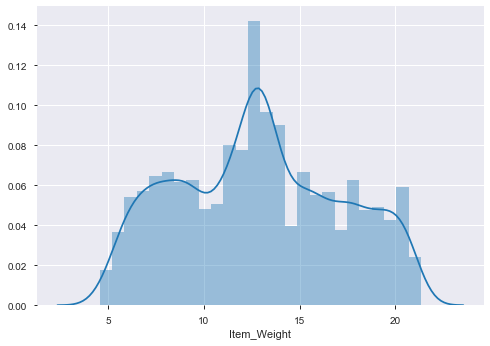

In [49]:
sb.distplot(data['Item_Weight'])

In [50]:
data.groupby(['Outlet_Identifier','Outlet_Size'])['Outlet_Size'].count()

Outlet_Identifier  Outlet_Size
OUT013             High           932
OUT018             Medium         928
OUT019             Small          528
OUT027             Medium         935
OUT035             Small          930
OUT046             Small          930
OUT049             Medium         930
Name: Outlet_Size, dtype: int64

In [51]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [52]:
x=data[['Outlet_Type','Outlet_Size']]
x[x['Outlet_Size']=='Medium']['Outlet_Type'].value_counts()

Supermarket Type3    935
Supermarket Type1    930
Supermarket Type2    928
Name: Outlet_Type, dtype: int64

In [53]:
x=data[['Outlet_Type','Outlet_Size']]
x[x['Outlet_Size']=='High']['Outlet_Type'].value_counts()

Supermarket Type1    932
Name: Outlet_Type, dtype: int64

In [54]:
x=data[['Outlet_Type','Outlet_Size']]
x[x['Outlet_Size']=='Small']['Outlet_Type'].value_counts()

Supermarket Type1    1860
Grocery Store         528
Name: Outlet_Type, dtype: int64

In [55]:
ddd=data[data['Outlet_Type']=='Supermarket Type1']
ddd.groupby(['Outlet_Location_Type','Outlet_Size'])['Outlet_Size'].count()

Outlet_Location_Type  Outlet_Size
Tier 1                Medium         930
                      Small          930
Tier 2                Small          930
Tier 3                High           932
Name: Outlet_Size, dtype: int64

In [56]:
for i in range(len(data['Outlet_Size'])):
    if pd.isnull(data['Outlet_Size'].iloc[i]):
        if data['Outlet_Type'].iloc[i]=='Grocery Store':
            data['Outlet_Size'].iloc[i]='Small'
        elif data['Outlet_Type'].iloc[i]=='Supermarket Type2':
            data['Outlet_Size'].iloc[i]='Medium'
        elif data['Outlet_Type'].iloc[i]=='Supermarket Type3':
            data['Outlet_Size'].iloc[i]='Medium'
        elif data['Outlet_Type'].iloc[i]=='Supermarket Type1':
            if data['Outlet_Location_Type'].iloc[i]=='Tier 1':
                    data['Outlet_Size'].iloc[i]='Medium'# being  mode is medium 
            elif data['Outlet_Location_Type'].iloc[i]=='Tier 2':
                data['Outlet_Size'].iloc[i]='Small'
            elif data['Outlet_Location_Type'].iloc[i]=='Tier 3':
                data['Outlet_Size'].iloc[i]='High'
        

In [57]:
data['Outlet_Size'].isnull().sum()

0

In [58]:
data1=data.copy() # making a copy of data so that we can modify the columns

In [59]:
data1=data.drop(['Item_Identifier','Item_Fat_Content'],axis=1)

In [60]:
data1=pd.get_dummies(data1, prefix='a')

In [61]:
data1.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,a_Baking Goods,a_Breads,a_Breakfast,a_Canned,a_Dairy,...,a_High,a_Medium,a_Small,a_Tier 1,a_Tier 2,a_Tier 3,a_Grocery Store,a_Supermarket Type1,a_Supermarket Type2,a_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


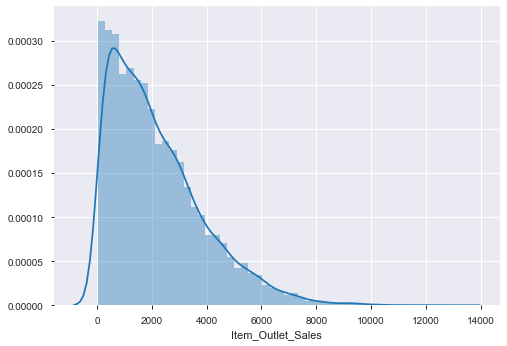

In [62]:
sb.distplot(data['Item_Outlet_Sales'])

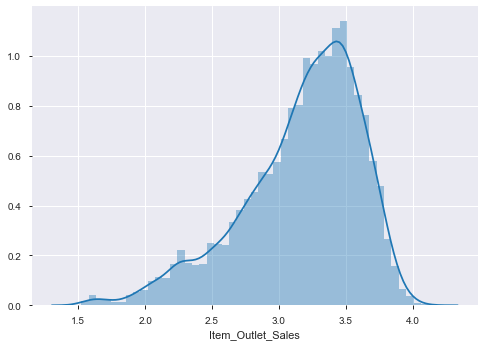

In [63]:
sb.distplot(np.log10(data['Item_Outlet_Sales']))

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [65]:
X=data1.drop(['Item_Outlet_Sales','Outlet_Establishment_Year','Item_Weight',],axis=1)
Y=data1[['Item_Outlet_Sales']]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=3)

In [66]:
reg=LinearRegression(normalize=True)   
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [68]:
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error
#rmse=np.sqrt(mean_squared_error(y_test1,y_pred1))
rmse=np.sqrt(mean_squared_error(y_pred,y_test))
r2=r2_score(y_test,y_pred)
print('rmse=',rmse)

rmse= 1086.294907990791


In [69]:
alpha_list=[0.01,0.05,0.5,5]
for i in alpha_list:
    ridgeReg=Ridge(alpha=i,normalize=True)
    ridgeReg.fit(x_train,y_train)
    rpred=ridgeReg.predict(x_test)
    from sklearn.metrics import r2_score,mean_squared_error
    rmse=np.sqrt(mean_squared_error(rpred,y_test))
    print('Alpha=',i)
    print('rmse=',rmse)
    print(' ')

Alpha= 0.01
rmse= 1087.0051018563809
 
Alpha= 0.05
rmse= 1090.587279229989
 
Alpha= 0.5
rmse= 1161.7271328978459
 
Alpha= 5
rmse= 1498.8473846509053
 


In [70]:
for i in alpha_list:
    lassoReg=Lasso(alpha=i,normalize=True)
    lassoReg.fit(x_train,y_train)
    pred=lassoReg.predict(x_test)
    rmse=np.sqrt(mean_squared_error(pred,y_test))
    print('alpha',i)
    print('rmse=',rmse)   
    print(' ')

alpha 0.01
rmse= 1086.0913215031712
 
alpha 0.05
rmse= 1085.3867535491977
 
alpha 0.5
rmse= 1089.8381379669033
 
alpha 5
rmse= 1336.9914452176147
 


In [74]:
from xgboost import XGBRegressor

xgb=XGBRegressor(n_estimators=100,random_state=0,silent=True)

xgb.fit(x_train,y_train)
y_predict=xgb.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_predict,y_test))
print('rmse=',rmse)
#accuracy_score(y_test,y_predict)*100

rmse= 1029.4116636903905
